In [157]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [158]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [159]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
data = np.array(data)
n_row, n_col = data.shape
np.random.shuffle(data)

test_set = data[0:1000].T
Y_test = test_set[0]
X_test = test_set[1:n_col]
X_test = X_test / 255

train_set = data[1000:n_row].T
Y_train = train_set[0]
X_train = train_set[1:n_col]
X_train = X_train / 255
_, m_train = X_train.shape
print("X_test")
X_test

X_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Each image is 28x28 -> 784 pixels

Input(784 neurons) -> 1st Hidden Layer(10 neurons) -> Output Layer(10 neurons) 

* W1: 784 x 10
* b1: 10 x 1
* W2: 10 x 10
* b2: 10 x 1

*Note: W1,b1, W2, b2 are recommended to both positive and negative to produce curves in activation function

In [161]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [162]:
def ReLu(Y):
    R = np.maximum(0, Y)
    return R

In [163]:
def softmax(Y):
    expY = np.exp(Y - np.max(Y, axis=0, keepdims=True))  # subtract max for stability
    return expY / np.sum(expY, axis=0, keepdims=True)

In [164]:
def forward_prop(W1, b1, W2, b2, X):
    L1 = W1.dot(X) + b1
    A1 = ReLu(L1)
    OL = W2.dot(A1) + b2
    A2 = softmax(OL)
    return L1, A1, OL, A2

**one_hot**: convert Y_train into a matrix of 1-for-the-correct-label and the-rest-is-0 -> cal errors after forward_prop

In [165]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [166]:
def ReLU_deriv(Y):
    return Y > 0

In [167]:
# gpt to understand
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / n_row * dZ2.dot(A1.T)
    db2 = 1 / n_row * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / n_row * dZ1.dot(X.T)
    db1 = 1 / n_row * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [168]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

# Frame

In [169]:
def get_prediction(A2):
    return np.argmax(A2, 0)

In [170]:
def get_accuracy(predictions, Y):
    return ("Accuracy: " , np.sum(predictions == Y) / Y.size)

In [171]:
def gradient_descent(X, Y, learning_rate, n_epoch):
    W1, b1, W2, b2 = init_params()

    for i in range(n_epoch):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if i % 10 == 0:
            predictions = get_prediction(A2)
            print(get_accuracy(predictions, Y))

    return W1, b1, W2, b2
          

# Train

In [172]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

('Accuracy: ', 0.08)
('Accuracy: ', 0.0986829268292683)
('Accuracy: ', 0.13902439024390245)
('Accuracy: ', 0.2081951219512195)
('Accuracy: ', 0.27602439024390246)
('Accuracy: ', 0.3369268292682927)
('Accuracy: ', 0.3786341463414634)
('Accuracy: ', 0.4121463414634146)
('Accuracy: ', 0.451609756097561)
('Accuracy: ', 0.5015853658536585)
('Accuracy: ', 0.5426829268292683)
('Accuracy: ', 0.5713658536585365)
('Accuracy: ', 0.5992682926829268)
('Accuracy: ', 0.6214146341463415)
('Accuracy: ', 0.6419512195121951)
('Accuracy: ', 0.6589024390243903)
('Accuracy: ', 0.6749024390243903)
('Accuracy: ', 0.6880975609756097)
('Accuracy: ', 0.6999512195121951)
('Accuracy: ', 0.7094146341463414)
('Accuracy: ', 0.7186585365853658)
('Accuracy: ', 0.7280975609756097)
('Accuracy: ', 0.7359024390243902)
('Accuracy: ', 0.7430243902439024)
('Accuracy: ', 0.7495365853658537)
('Accuracy: ', 0.7558292682926829)
('Accuracy: ', 0.7618780487804878)
('Accuracy: ', 0.7666341463414634)
('Accuracy: ', 0.7718780487804878

# Test

In [175]:
def make_prediction(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    prediction = get_prediction(A2)
    return prediction

In [185]:
def test(index, W1, b1, W2, b2):
    current_image = X_test[:, index]
    prediction = make_prediction(current_image, W1, b1, W2, b2)
    print("Prediction: ", prediction)
    print("Label: ", Y_test[index])

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2 1 2 1 1 2 1 1 1 2]
Label:  9


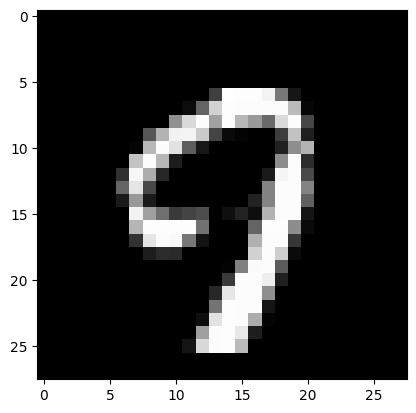

Prediction:  [2 1 2 1 1 2 2 1 1 2]
Label:  0


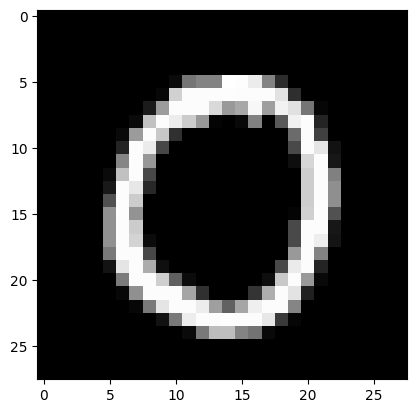

Prediction:  [2 1 1 1 1 2 2 1 1 2]
Label:  3


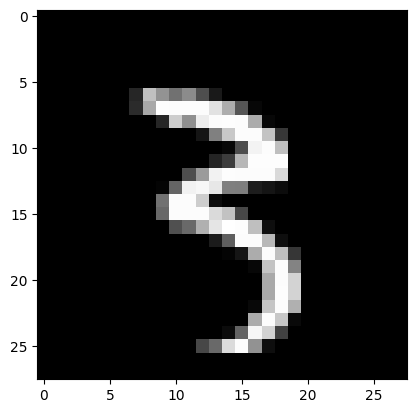

Prediction:  [2 1 1 1 1 2 1 1 1 1]
Label:  7


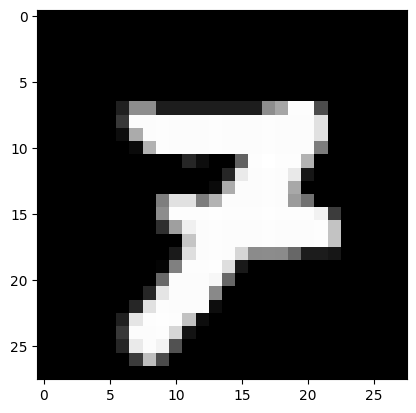

In [186]:
test(0, W1, b1, W2, b2)
test(1, W1, b1, W2, b2)
test(2, W1, b1, W2, b2)
test(3, W1, b1, W2, b2)